# `Example`

In [15]:
%load_ext autoreload
%autoreload 2
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:95% !important; }</style>"))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load Data and Train a Regression Model

In [16]:
# load data, train model
from sklearn import linear_model, datasets
from sklearn.model_selection import cross_val_predict

# loading a sample regression dataset
boston = datasets.load_boston()
X = boston.data
y_true = boston.target

# defining a simple linear regression model
model = linear_model.LinearRegression()

# predicting using 4-folds cross-validation
y_pred = cross_val_predict(model, X, y_true, cv=4)

/Users/atahmassebi/Desktop/AmirStuff/GitHub/Regression-Error-Characteristic-Curve/.venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::

### Let's try to plot REC curve

In [17]:
# import the RegressionErrorCharacteristic
from rec import RegressionErrorCharacteristic

help(RegressionErrorCharacteristic)

Help on class RegressionErrorCharacteristic in module rec._rec:

class RegressionErrorCharacteristic(builtins.object)
 |  RegressionErrorCharacteristic(y_true: Union[List[float], pandas.core.series.Series, numpy.ndarray], y_pred: Union[List[float], pandas.core.series.Series, numpy.ndarray]) -> None
 |  
 |  Regression Error Characteristics (REC).
 |  
 |  Notes
 |  -----
 |  This is wrapper to implement the REC algorithm. The REC is implemented based on the _[1] paper
 |  and the initial idea originally presented in _[2] paper. The Simpson method is used as the
 |  integral method to calculate the area under REC.
 |  
 |  References
 |  ---------
 |  .. [1] Tahmassebi, A., Gandomi, A. H., & Meyer-Baese, A. (2018, July). A Pareto front based
 |         evolutionary model for airfoil self-noise prediction. In 2018 IEEE Congress on
 |         Evolutionary Computation (CEC) (pp. 1-8). IEEE.
 |         https://www.amirhessam.com/assets/pdf/projects/cec-airfoil2018.pdf
 |  
 |  .. [2] Bi, J.

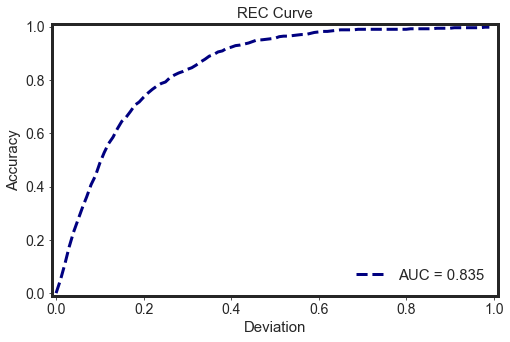

In [18]:
# instantiate the RegressionErrorCharacteristic with y_pred and y_true
r = RegressionErrorCharacteristic(y_true, y_pred)

# now we can plot the REC curve
r.plot()

### We can also access the plotting data directly

In [19]:
# area under rec curve
r.auc_rec

0.8348534255599472

In [20]:
# deviation array
r.deviation

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [21]:
# accuracy array
r.accuracy

array([0.        , 0.04940711, 0.10869565, 0.17391304, 0.22924901,
       0.27470356, 0.3201581 , 0.36166008, 0.40711462, 0.44071146,
       0.48814229, 0.52766798, 0.56126482, 0.58498024, 0.61660079,
       0.64426877, 0.66007905, 0.68181818, 0.7055336 , 0.7173913 ,
       0.73517787, 0.75098814, 0.76482213, 0.77667984, 0.78656126,
       0.79249012, 0.8083004 , 0.81818182, 0.82608696, 0.83201581,
       0.83992095, 0.8458498 , 0.85573123, 0.86758893, 0.87747036,
       0.88932806, 0.89525692, 0.90513834, 0.90909091, 0.91897233,
       0.9229249 , 0.92885375, 0.93083004, 0.93478261, 0.93873518,
       0.94466403, 0.95059289, 0.95059289, 0.95256917, 0.95454545,
       0.95652174, 0.96245059, 0.96442688, 0.96442688, 0.96640316,
       0.96837945, 0.97035573, 0.97035573, 0.9743083 , 0.97826087,
       0.98023715, 0.98221344, 0.98221344, 0.98418972, 0.98616601,
       0.98814229, 0.98814229, 0.98814229, 0.98814229, 0.99011858,
       0.99011858, 0.99011858, 0.99011858, 0.99011858, 0.99011